In [12]:
import pandas as pd
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split

df = pd.read_csv("dataset/preprocessed.csv")
df.shape

(762106, 44)

In [13]:
df = df.drop(df[df.target == -1].index)
df.shape

(762094, 44)

In [14]:
# Separate input features and target
y = df.target

In [15]:
X = df.drop('target', axis=1)

In [16]:
# setting up testing and training sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [17]:
sm = SMOTETomek(random_state = 27, n_jobs = -1)

X_train, y_train = sm.fit_sample(X_train, y_train)

In [18]:
print(X_train.shape)

(892296, 43)


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix

In [20]:
# Train the model

rfc = RandomForestClassifier(n_estimators=100,n_jobs=-1).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [21]:
# Performance results

print(accuracy_score(y_test, rfc_pred))
print(f1_score(y_test, rfc_pred, average = 'weighted'))
print(precision_score(y_test, rfc_pred, average = 'weighted'))
print(recall_score(y_test, rfc_pred, average = 'weighted'))

0.536625307047931
0.533779108870848
0.5323331136127586
0.536625307047931


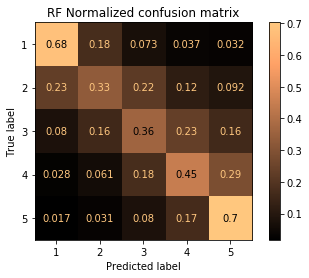

In [22]:
# Plot normalized confusion matrix

import matplotlib.pyplot as plt
classes = ["1", "2", "3", "4", "5"]
title = "RF Normalized confusion matrix"
disp = plot_confusion_matrix(rfc, X_test, y_test, display_labels = classes, cmap = "copper", normalize = "true")
disp.ax_.set_title(title)
plt.show()